# ONEVSALL

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#-----------------------------------
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
#-----------------------------------
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#-----------------------------------
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#-----------------------------------
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix
#Load train and test data from .csv files into Pandas DataFrame —

train_data = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_train_all.csv') 
test_data = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_test_all.csv')
train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_train_all.csv') 
test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_test_all.csv')
zero_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/0_vrs_all/y_train_0.csv') 
zero_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/0_vrs_all/y_test_0.csv')
one_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/1_vrs_all/y_test_1.csv') 
one_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/1_vrs_all/y_train_1.csv')
two_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/2_vrs_all/y_train_2.csv') 
two_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/2_vrs_all/y_test_2.csv')
three_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/3_vrs_all/y_test_3.csv') 
three_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/3_vrs_all/y_train_3.csv')
four_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/4_vrs_all/y_train_4.csv') 
four_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/4_vrs_all/y_test_4.csv')
five_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/5_vrs_all/y_test_5.csv') 
five_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/5_vrs_all/y_train_5.csv')
six_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/6_vrs_all/y_train_6.csv') 
six_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/6_vrs_all/y_test_6.csv')
seven_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/7_vrs_all/y_test_7.csv') 
seven_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/7_vrs_all/y_train_7.csv')
eight_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/8_vrs_all/y_train_8.csv') 
eight_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/8_vrs_all/y_test_8.csv')
nine_train_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/9_vrs_all/y_test_9.csv') 
nine_test_label = pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/9_vrs_all/y_train_9.csv')
#Train and Test data shape

print("Train size:", zero_train_label.shape)
print("Test size:", zero_test_label.shape)


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [3]:
zero_train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       9690 non-null   int64
dtypes: int64(1)
memory usage: 75.8 KB


In [4]:
one_train_label['0']

0       0
1       1
2       1
3       1
4       1
       ..
3085    0
3086    1
3087    1
3088    0
3089    1
Name: 0, Length: 3090, dtype: int64

In [5]:
one_index=one_train_label.index[one_train_label['0'] == 0].tolist()

In [6]:
one_train_label.iloc[6]

0    0
Name: 6, dtype: int64

In [7]:
one_index

[0,
 6,
 13,
 16,
 19,
 22,
 26,
 27,
 29,
 38,
 43,
 48,
 53,
 61,
 63,
 64,
 65,
 66,
 67,
 72,
 74,
 90,
 91,
 97,
 110,
 112,
 115,
 121,
 125,
 129,
 131,
 132,
 133,
 136,
 141,
 153,
 155,
 156,
 162,
 173,
 180,
 183,
 185,
 196,
 207,
 209,
 215,
 216,
 224,
 227,
 229,
 231,
 235,
 239,
 241,
 242,
 243,
 247,
 249,
 254,
 258,
 259,
 265,
 267,
 271,
 273,
 287,
 292,
 298,
 300,
 305,
 312,
 321,
 328,
 333,
 338,
 340,
 354,
 361,
 370,
 376,
 377,
 381,
 387,
 393,
 395,
 404,
 411,
 414,
 415,
 417,
 418,
 421,
 428,
 433,
 448,
 450,
 451,
 452,
 459,
 460,
 462,
 465,
 467,
 470,
 471,
 481,
 483,
 486,
 490,
 492,
 495,
 498,
 500,
 509,
 512,
 528,
 531,
 534,
 535,
 536,
 544,
 546,
 549,
 550,
 552,
 554,
 555,
 563,
 564,
 568,
 571,
 573,
 577,
 581,
 584,
 586,
 593,
 607,
 608,
 610,
 613,
 620,
 631,
 633,
 636,
 639,
 640,
 645,
 646,
 648,
 649,
 650,
 657,
 659,
 660,
 675,
 677,
 680,
 681,
 685,
 688,
 690,
 691,
 692,
 700,
 701,
 702,
 704,
 709,
 716,


In [8]:
oneTrainData=train_data.iloc[one_index]

In [9]:
oneTrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 3088
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 12.7 MB


In [10]:
oneTrainLabel=one_train_label.iloc[one_index]

In [11]:
oneTrainLabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 3088
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       720 non-null    int64
dtypes: int64(1)
memory usage: 11.2 KB


In [15]:
selector = SelectKBest(chi2, k=5)
selector.fit(oneTrainData, oneTrainLabel)

X_new = selector.transform(oneTrainData)
X_new.shape
new_feat=selector.get_support(indices=True)
new_feat

array([2299, 2300, 2301, 2302, 2303])

In [18]:
new_feat = ['{:.0f}'.format(x) for x in new_feat]
print(new_feat)

['2299', '2300', '2301', '2302', '2303']


In [ ]:
df1 = train_data[new_feat]

In [ ]:
df1.info()


In [19]:
def run_gaussian_nb(d2_train_dataset, Y):
	X_train, X_test, y_train, y_test = train_test_split(d2_train_dataset, Y, test_size=0.25, random_state=0)
	gnb = GaussianNB()
	y_pred = gnb.fit(X_train, y_train).predict(X_test)
	print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

 

	mean(cross_val_score(gnb, X_train, y_train, cv=5, scoring="accuracy"))

 

	# Model Accuracy, how often is the classifier correct?
	print("Accuracy: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))

 

 

	pscore = precision_score(y_test, y_pred,  average='weighted', labels=np.unique(y_test))
	rscore = recall_score(y_test, y_pred, average='weighted')
	f1score = f1_score(y_test, y_pred,  average='weighted')
	print(f'The given data set with Gaussian Naive Bayes has Precision Score {pscore} Recall Score {rscore} and F1 Score {f1score}')

In [20]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]:
           TP += 1
        if y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]:
           TN += 1
        if y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP / (TP+FN), FP/(FP+TN))

In [21]:
def run_gaussian_nb(d2_train_dataset, Y):
	X_train, X_test, y_train, y_test = train_test_split(d2_train_dataset, Y, test_size=0.25, random_state=0)
	gnb1 = GaussianNB()
	y_pred = gnb1.fit(X_train, y_train).predict(X_test)
	print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

	mean(cross_val_score(gnb1, X_train, y_train, cv=5, scoring="accuracy"))

	# Model Accuracy, how often is the classifier correct?
	print("Accuracy: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
	tprate, fprate = (perf_measure(y_test, y_pred))
	print(f'The given data set with Gaussian Naive Bayes has TP Rate {tprate} and FP Rate {fprate}')


	pscore = precision_score(y_test, y_pred,  average='weighted', labels=np.unique(y_test))
	rscore = recall_score(y_test, y_pred, average='weighted')
	f1score = f1_score(y_test, y_pred,  average='weighted')
	print(f'The given data set with Gaussian Naive Bayes has Precision Score {pscore} Recall Score {rscore} and F1 Score {f1score}')
	mat = confusion_matrix(y_test, y_pred)
	sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
	plt.xlabel('true label')
	plt.ylabel('predicted label')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [23]:
def find_correlating_features(trainData,trainLabel,n):
    a=["zero","one","two","three","four","five","six","seven","eight","nine"]
    for x in range(10):
         testLabelIndex=[]
         new_feat=[]
         fileName='/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/'+str(x)+'_vrs_all/y_train_'+str(x)+'.csv'
         testData=pd.read_csv(fileName) 
         testLabelIndex.clear()
         testLabelIndex=testData.index[testData['0'] == 0].tolist()
         trainData=train_data.iloc[testLabelIndex]
         trainLabel=testData.iloc[testLabelIndex]
         print(trainData.head())
         print(trainData.tail())
         print(trainLabel.head())
         print(trainLabel.tail())
         #featureNewData = SelectKBest(chi2, k=5).fit_transform(trainData,trainData)
         bestfeatures = SelectKBest(score_func=chi2, k=10)
         fit = bestfeatures.fit(trainData,trainLabel)
         print(fit.scores_)
         dfscores = pd.DataFrame(fit.scores_)
         print(dfscores)
         dfcolumns = pd.DataFrame(trainData.columns)
         featureScores = pd.concat([dfcolumns,dfscores],axis=1)
         featureScores.columns = ['Specs','Score']  #naming the dataframe columns
         #print(featureScores.nlargest(10,'Score'))  #print 10 best features
         featureScoresAll5 = featureScores.nlargest(5,'Score')
         
         #new_feat=selector.get_support(indices=True)
         print('-------------------------------------------------------------------------')
         print(fileName)
         print(trainData.head())
         print(trainData.tail())
         print(trainLabel.head())
         print(trainLabel.tail())
         #print(X_new.shape)
         print(featureScoresAll5)

In [24]:
def find_correlating_features(trainData,trainLabel,n):
    a=["zero","one","two","three","four","five","six","seven","eight","nine"]
    
    for x in range(3):
         testLabelIndex=[]
         new_feat=[]
         fileName='/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/'+str(x)+'_vrs_all/y_train_'+str(x)+'.csv'
         ntestData=pd.read_csv(fileName) 
         testLabelIndex.clear()
         testLabelIndex=ntestData.index[ntestData['0'] == 0].tolist()
         ntrainData=trainData.iloc[testLabelIndex]
         ntrainLabel=trainLabel.iloc[testLabelIndex]
         print('-------------------------------------------------------------------------')
         print(fileName)
         #featureNewData = SelectKBest(chi2, k=5).fit_transform(trainData,trainData)
         selector = SelectKBest(chi2, k=n)
         selector.fit(ntrainData, ntrainLabel)

         X_new = selector.transform(ntrainData)
         
         new_feat=selector.get_support(indices=True)
         
         print(new_feat)
         new_feat=np.array(new_feat).astype('str').tolist()
         print(new_feat)
         
         newData=trainData.loc[:,new_feat]
         print(newData.head())
         run_gaussian_nb(newData,np.array(trainLabel).ravel())

# TOP 50 BEST FEATURES

-------------------------------------------------------------------------
/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/0_vrs_all/y_train_0.csv
[2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267
 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279 2280 2281
 2282 2283 2284 2285 2286 2287 2288 2289 2290 2291 2292 2293 2294 2295
 2296 2297 2298 2299 2300 2301 2302 2303]
['2254', '2255', '2256', '2257', '2258', '2259', '2260', '2261', '2262', '2263', '2264', '2265', '2266', '2267', '2268', '2269', '2270', '2271', '2272', '2273', '2274', '2275', '2276', '2277', '2278', '2279', '2280', '2281', '2282', '2283', '2284', '2285', '2286', '2287', '2288', '2289', '2290', '2291', '2292', '2293', '2294', '2295', '2296', '2297', '2298', '2299', '2300', '2301', '2302', '2303']
    2254   2255   2256   2257   2258   2259   2260   2261   2262   2263  ...  \
0  100.0   97.0   85.0   92.0  102.0   85.0   73.0   72.0   71.0   68.0  ...   
1  102.0  104.0   74.0   77.

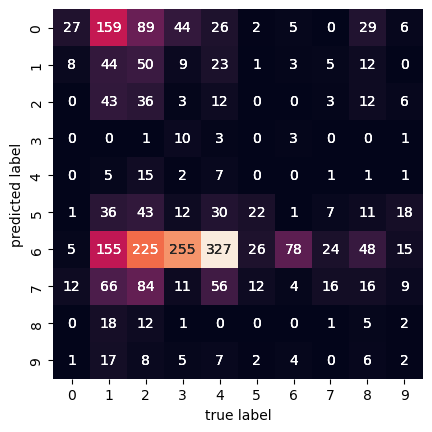

In [25]:
find_correlating_features(train_data,train_label,50)

# TOP 100 BEST FEATURES

-------------------------------------------------------------------------
/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/0_vrs_all/y_train_0.csv
[2204 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217
 2218 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231
 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245
 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259
 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273
 2274 2275 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287
 2288 2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301
 2302 2303]
['2204', '2205', '2206', '2207', '2208', '2209', '2210', '2211', '2212', '2213', '2214', '2215', '2216', '2217', '2218', '2219', '2220', '2221', '2222', '2223', '2224', '2225', '2226', '2227', '2228', '2229', '2230', '2231', '2232', '2233', '2234', '2235', '2236', '2237', '2238', '2239', '2240', '2241', '2242', '2243', '2244', '2245'

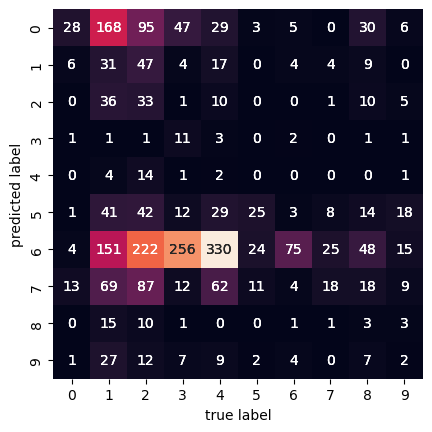

In [26]:
find_correlating_features(train_data,train_label,100)

# TOP 200 BEST FEATURES

-------------------------------------------------------------------------
/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/OneVsAll/0_vrs_all/y_train_0.csv
[2104 2105 2106 2107 2108 2109 2110 2111 2112 2113 2114 2115 2116 2117
 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127 2128 2129 2130 2131
 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141 2142 2143 2144 2145
 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159
 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173
 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187
 2188 2189 2190 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201
 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215
 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229
 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243
 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257
 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269 22

Accuracy: 0.0924
The given data set with Gaussian Naive Bayes has TP Rate 0.09244737928188196 and FP Rate 0.907552620718118
The given data set with Gaussian Naive Bayes has Precision Score 0.3009262640463183 Recall Score 0.09244737928188196 and F1 Score 0.07545378028547058


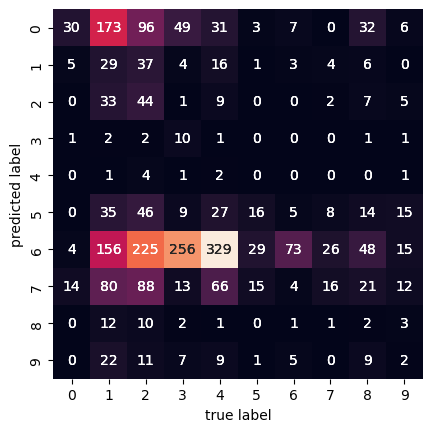

In [29]:
find_correlating_features(train_data,train_label,200)